<hr style="margin-top: 5px; margin-bottom: 5px">
<a href="./04_Julia_Plots.ipynb"> <<< 04 - Julia Plots <<< </a>
<hr style="margin-top: 5px; margin-bottom: 5px">

# Julia OLS

From stdlib:
- [Random](https://docs.julialang.org/en/v1/stdlib/Random/) for generating data

Need to be installed first:
- Plots for a scatter plot
- [GLM](https://juliastats.org/GLM.jl/stable/) for OLS fitting depends on 
    * [StatsModels](https://juliastats.org/StatsModels.jl/stable/): `@formula` to set the R-like "formula"
    * [StatsAPI](https://github.com/JuliaStats/StatsAPI.jl): `coeftable()` to extract results
        - CoefTable to DataFrame: `using DataFrames; DataFrame(coeftable(model))`

In [3]:
using Random
Random.seed!(1984)
n = 100
x = 2.5 * randn(n) .+ 1.5   # Array of n values with mean = 1.5, stddev = 2.5
res = 0.5 * randn(n)        # Generate n residual terms
y = 2 .+ 0.3 * x .+ res;    # Actual values of Y
first(y, 3)

3-element Vector{Float64}:
 2.9876521059564247
 3.085666234168655
 1.9753324634079288

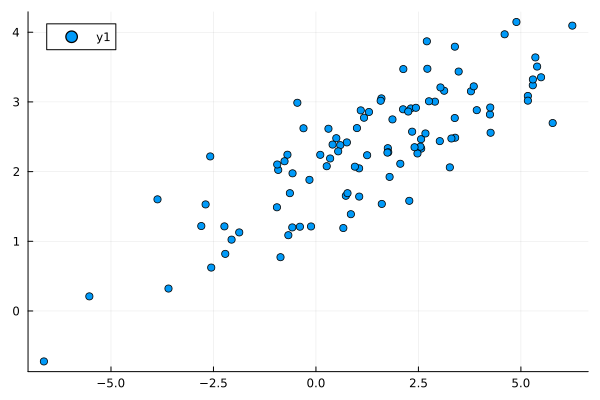

In [2]:
using Plots
scatter(x,y)

In [4]:
using DataFrames
data = DataFrame(X=x, Y=y);
first(data, 3)

Row,X,Y
,Float64,Float64
1,-0.453468,2.98765
2,5.16996,3.08567
3,-0.570555,1.97533


In [1]:
using GLM
fm = @formula(Y ~ X)

FormulaTerm
Response:
  Y(unknown)
Predictors:
  X(unknown)

In [5]:
fit_ols = lm(fm, data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  1.93265    0.058527   33.02    <1e-54   1.8165     2.04879
X            0.290973   0.0205327  14.17    <1e-24   0.250226   0.331719
────────────────────────────────────────────────────────────────────────

## Running code from files
From Terminal, navigate to where `ols.jl` sits:
- `julia --project=. ols.jl`

From REPL in an interactive Julia session:
- `include("ols.jl")`

<hr style="margin-top: 5px; margin-bottom: 5px">
<a href="./04_Julia_Plots.ipynb"> <<< 04 - Julia Plots <<< </a>
<hr style="margin-top: 5px; margin-bottom: 5px">

&copy; 2022
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img style="float: right" alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>